In [34]:
import pandas as pd

#参数初始化
inputfile = './BLE_RSSI_dataset/iBeacon_RSSI_UnLabeled.csv' #销量及其他属性数据
outputfile = './BLE_RSSI_dataset/iBeacon_RSSI_PreLabeled.csv' #保存结果的文件名
k = 15 #聚类的类别
iteration = 3 #聚类最大循环次数
data = pd.read_csv(inputfile) #读取数据
data = data.drop(columns=['location','date'])

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, max_iter = iteration) #分为k类
#model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration) #分为k类，并发数4
model.fit(data) #开始聚类

#简单打印结果
r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
print(r)
r.columns = list(data.columns) + [u'类别数目'] #重命名表头
print(r)

#详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(data.columns) + [u'聚类类别'] #重命名表头
#r.to_excel(outputfile) #保存结果

            0           1           2           3           4           5   \
0  -120.927374 -107.418994 -196.969274 -197.639665  -80.762570 -183.103352   
1   -80.275449 -199.570858 -200.000000 -200.000000 -192.714571 -199.536926   
2  -197.044503  -95.426702  -84.083770 -159.675393 -126.905759  -83.937173   
3  -184.334545 -188.145455 -182.356364 -199.127273 -200.000000  -77.287273   
4  -199.625899 -193.111511 -199.651079 -200.000000 -173.248201 -180.967626   
5  -194.485185  -80.181481 -200.000000 -193.466667  -83.159259  -82.500000   
6  -192.392857 -197.982143 -186.500000  -80.174107 -181.566964 -114.142857   
7  -193.789583 -200.000000 -200.000000 -200.000000 -199.347917 -199.797917   
8  -200.000000 -195.349515 -195.601942 -199.336570 -139.967638 -200.000000   
9  -200.000000 -200.000000 -200.000000 -200.000000 -200.000000 -199.584989   
10 -199.523573  -79.079404 -145.401985 -188.786600 -115.719603 -200.000000   
11 -199.035484 -196.351613 -199.383871 -200.000000 -198.735484 -

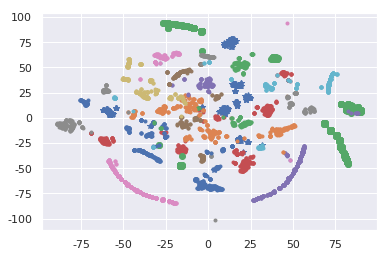

In [41]:
#用TSNE进行数据降维并展示聚类结果
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(data) #进行数据降维,并返回结果
tsne = pd.DataFrame(tsne.embedding_, index = data.index) #转换数据格式

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

#不同类别用不同颜色和样式绘图
d = tsne[r[u'聚类类别'] == 0]     #找出聚类类别为0的数据对应的降维结果
plt.plot(d[0], d[1], 'r.')
d = tsne[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')
d = tsne[r[u'聚类类别'] == 3]
plt.plot(d[0], d[1], '.')
d = tsne[r[u'聚类类别'] == 4]
plt.plot(d[0], d[1], '.')
d = tsne[r[u'聚类类别'] == 5]
plt.plot(d[0], d[1], '.')
d = tsne[r[u'聚类类别'] == 6]
plt.plot(d[0], d[1], '.')
d = tsne[r[u'聚类类别'] == 7]
plt.plot(d[0], d[1], '.')
d = tsne[r[u'聚类类别'] == 8]
plt.plot(d[0], d[1], '.')
d = tsne[r[u'聚类类别'] == 9]
plt.plot(d[0], d[1], '.')
d = tsne[r[u'聚类类别'] == 10]
plt.plot(d[0], d[1], '.')
d = tsne[r[u'聚类类别'] == 11]
plt.plot(d[0], d[1], '.')
d = tsne[r[u'聚类类别'] == 12]
plt.plot(d[0], d[1], '.')
d = tsne[r[u'聚类类别'] == 13]
plt.plot(d[0], d[1], '.')
d = tsne[r[u'聚类类别'] == 14]
plt.plot(d[0], d[1], '.')
d = tsne[r[u'聚类类别'] == 15]
plt.plot(d[0], d[1], '.')
plt.show()